In [532]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import math
import scipy.integrate
import pandas as pd
import seaborn as sb
import surfaces_and_fields.system_cylinder as cylinder
import os
import matplotlib

firsttime=True

plt.rcParams["figure.figsize"]=10,10
plt.rcParams['font.size'] = '24'

In [7]:
#getting area for a certain k
def area(k,a): 
    cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    return cy.evaluate_A_integral_0(amplitude=a)
area(1,.5)

6.2403678989376985

In [142]:
#getting (A-A_0)^2 or |A-A_0| instead
def area_diff_squared(k,a, A0factor, cy=None, basearea=None):
    if cy is None:
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    if basearea is None:
        basearea = cy.evaluate_A_integral_0(amplitude=0)
    return (cy.evaluate_A_integral_0(amplitude=a)-A0factor*basearea)**2

def area_diff(k,a, A0factor, cy=None, basearea=None):
    if cy is None:
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    if basearea is None:
        basearea = cy.evaluate_A_integral_0(amplitude=0)
    return cy.evaluate_A_integral_0(amplitude=a)-A0factor*basearea

print(area_diff_squared(1,0,1),
      area_diff_squared(1,.5,1),
      area_diff(1,0,1),
      area_diff(1,.5,1))

0.0 0.0018333304485524755 0.0 -0.04281740824188773


KeyError: 1

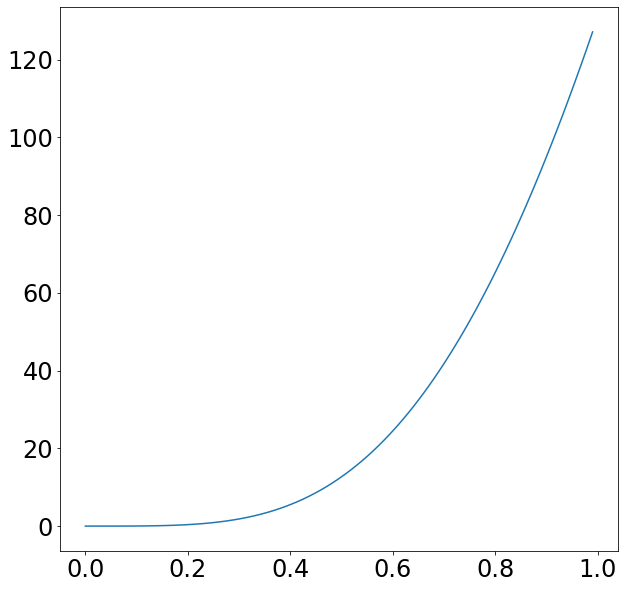

In [559]:
#visualize for A_0 = 1A
astep=.01
kstep=.01
a_s = np.arange(0, 1, astep)
ks = np.arange(0.1, 2, kstep)
minima={}
minenergies={}

areafactor=1

Es={}
for k in ks:
    Es[k]={}
    cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    basearea= cy.evaluate_A_integral_0(amplitude=0)
    for a in a_s:
        Es[k][a]=area_diff_squared(k,a,areafactor, cy, basearea)
for k in ks:
    plt.plot(Es[k].keys(), Es[k].values(), label=str(round(k,3)))
    l = zip(Es[k].values(), Es[k].keys())
    minima[areafactor][k] = min(l)
plt.legend()
plt.ylim((0,1))

(0.0, 1.0)

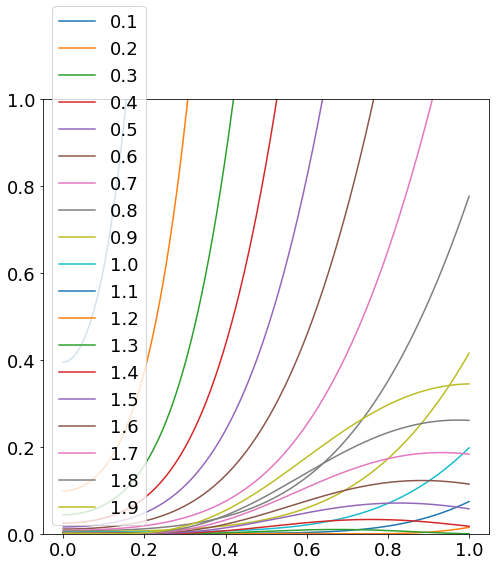

In [140]:
areafactor=1.01
ks = np.arange(.1, 2, .1)
Es={}
for k in ks:
    Es[k]={}
    cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    basearea= cy.evaluate_A_integral_0(amplitude=0)
    for a in a_s:
        Es[k][a]=area_diff_squared(k,a,areafactor, cy, basearea)
for k in ks:
    plt.plot(Es[k].keys(), Es[k].values(),  label=str(round(k,3)))
    l = zip(Es[k].values(), Es[k].keys())
    minima[areafactor][k] = min(l)
plt.legend()
plt.ylim((0,1))

(0.0, 1.0)

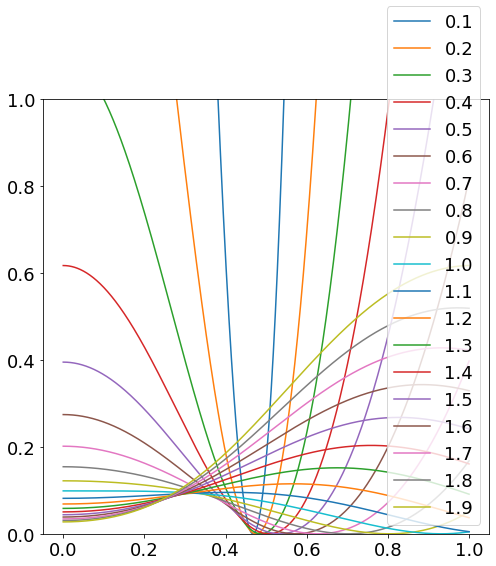

In [143]:
areafactor=.95
ks = np.arange(.1, 2, .1)
Es={}
for k in ks:
    Es[k]={}
    cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    basearea= cy.evaluate_A_integral_0(amplitude=0)
    for a in a_s:
        Es[k][a]=area_diff_squared(k,a,areafactor, cy, basearea)
for k in ks:
    plt.plot(Es[k].keys(), Es[k].values(), label=str(round(k,3)))
    l = zip(Es[k].values(), Es[k].keys())
    minima[areafactor][k] = min(l)
plt.legend()
plt.ylim((0,1))

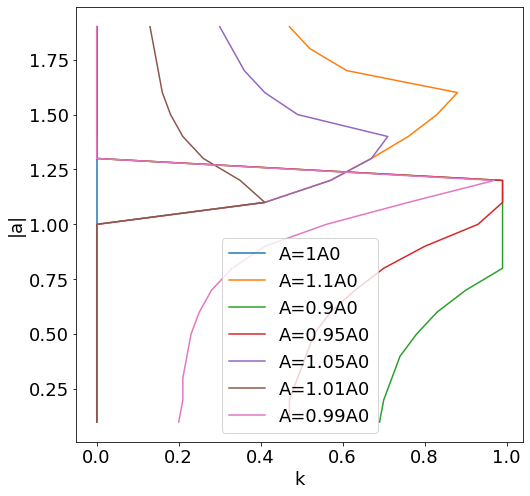

In [85]:
#plot minimizing a(k)
for areafactor in minima:
    plt.plot([abs(x[1]) for x in minima[areafactor].values()], minima[areafactor].keys(), label="A="+str(round(areafactor,2))+"A0")
plt.xlabel('k')
plt.ylabel('|a|')
plt.legend()

In [591]:
#how to numerically retrieve multiple minima?
areafactor=1
ks = np.arange(.1, 2, .01)
Es={}
minima[areafactor]=[]
for k in ks:
    Es[k]={}
    cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    basearea= cy.evaluate_A_integral_0(amplitude=0)
    for a in a_s:
        Es[k][a]=area_diff(k,a,areafactor, cy, basearea)
for k in ks:
    #plt.plot(Es[k].keys(), Es[k].values(), label=str(round(k,3)))
    l = list(zip(Es[k].values(), Es[k].keys()))
    signs = [np.sign(x[0]) for x in l]
    s=signs[0]
    signchanges=[]
    cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    basearea= cy.evaluate_A_integral_0(amplitude=0)
    if s==0:
        signchanges.append((0, 0))
        s=signs[1]
        print(signs)
    for n,i in enumerate(signs):
        if i != s:
                    #refine
                    start_a=l[n-1][1]
                    end_a=l[n][1]
                    step=astep/1000
                    finer_list = []
                    for a in np.arange(start_a,end_a, step):
                        finer_list.append(area_diff(k,a,areafactor, cy, basearea))
                    finer_signs=[np.sign(x) for x in finer_list]
                    #print(finer_signs)
                    for m,j in enumerate(finer_signs):
                        if j!=s:
                            energy = finer_list[m]
                            a=start_a+step*m
                            break
                    signchanges.append((energy, a))
                    s=i
    for (E,a) in signchanges:
        minima[areafactor].append((k,a))
#plt.legend()
#plt.ylim((-1,1))

[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0

[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0

[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0

[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0

[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0

[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0

[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

In [592]:
#how to numerically retrieve multiple minima?
areafactor=1
Es={}
#minima[areafactor]=[]
for a in a_s:
    Es[a]={}
    for k in ks:
        Es[a]
        Es[a][k]=area_diff(k,a,areafactor)
for a in a_s:
    #plt.plot(Es[k].keys(), Es[k].values(), label=str(round(k,3)))
    l = list(zip(Es[a].values(), Es[a].keys()))
    signs = [np.sign(x[0]) for x in l]
    s=signs[0]
    signchanges=[]
    for n,i in enumerate(signs):
        if i!=s:
                    #refine
                    start_k=l[n-1][1]
                    end_k=l[n][1]
                    step=kstep/100
                    finer_list = []
                    for k in np.arange(start_k,end_k, step):
                        finer_list.append(area_diff(k,a,areafactor))
                    finer_signs=[np.sign(x) for x in finer_list]
                    #print(finer_signs)
                    for m,j in enumerate(finer_signs):
                        if j!=s:
                            energy = finer_list[m]
                            k=start_k+step*m
                            break
                    signchanges.append((energy, k))
                    s=i
    for (E,k) in signchanges:
        minima[areafactor].append((k,a))

In [598]:
minima[1]
#del[minima[1][-2]]

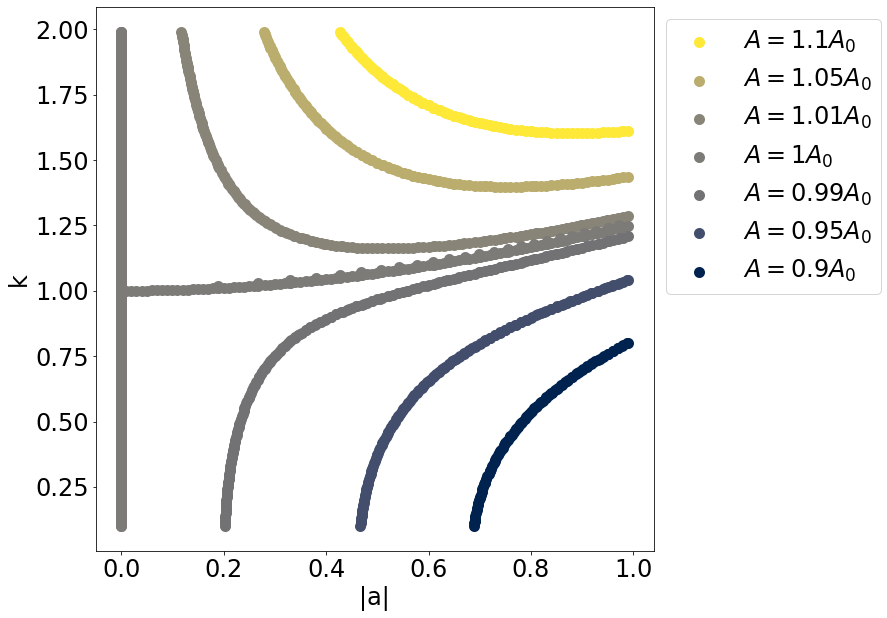

In [661]:
colors={}
for i in minima:
    value = (i-min(minima))/(max(minima)-min(minima))
    colors[i] = matplotlib.cm.cividis(value)
for areafactor in sorted(minima.keys())[::-1]:
    minima[areafactor].sort(key=lambda x: x[1])
    plt.scatter([x[1] for x in minima[areafactor]], [x[0] for x in minima[areafactor]], label=r'$A='+str(areafactor)+' A_0$', 
             color=colors[areafactor], linewidth=5)
#plt.plot([0,0], [.1, 2.0], label=areafactor, 
#             color=colors[1], linewidth=5)
#plt.plot([0,minima[1][0][1]], [1 ,minima[1][0][0]], label=areafactor, 
#             color=colors[1], linewidth=5)
plt.ylabel("k")
plt.xlabel("|a|")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig("constrained_tmp.png", bbox_inches = 'tight')

In [188]:
# generated a sufficient approximate (k,a) value pairs for each A_0
# now get bending rigidity, intrinsic curvature values for each

In [283]:
def curvenergy(k,a,H0=0, kappa=1, cy=None):
    if cy is None:
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=kappa, gamma=1, intrinsic_curvature=H0)
    return cy.calc_bending_energy(amplitude=a)*k/(math.pi*2) #bending energies need to be normalized to per length 2pi

In [666]:
ce={}
for H0 in [-10,-5,-3,-2,-1,0, 1,10]:
    ce[H0]={}
    for areafactor in minima:
        m=minima[areafactor]
        ce[H0][areafactor]=[]
        for (k,a) in m:
            ce[H0][areafactor].append(curvenergy(k,a,H0))

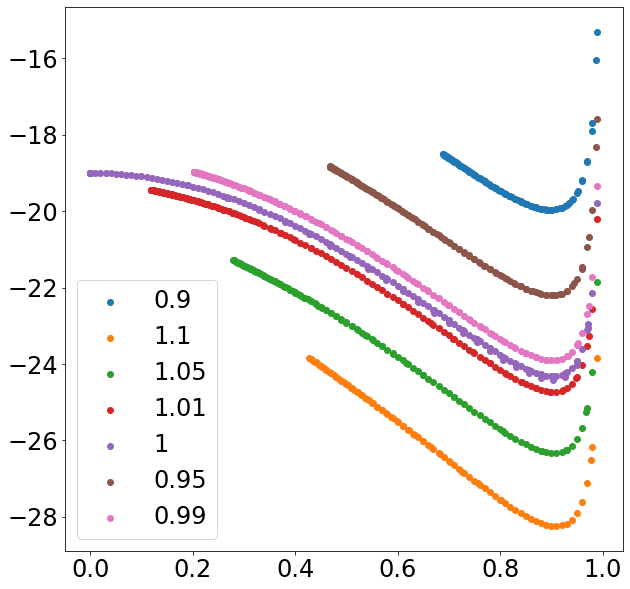

In [669]:
H0=-5
for areafactor in ce[H0]:
    plt.scatter([x[1] for x in minima[areafactor]], ce[H0][areafactor], label=str(areafactor))
plt.legend()

(-0.0495, 1.0395)


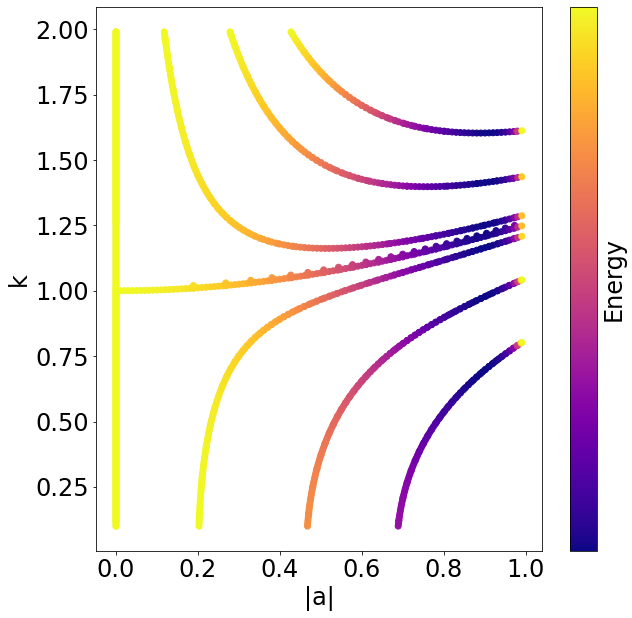

In [673]:
#color coding by bending energy
for areafactor in minima:
    plt.scatter([x[1] for x in minima[areafactor]], [x[0] for x in minima[areafactor]], 
                c=ce[H0][areafactor], cmap='plasma',label=areafactor)
#plt.legend()
plt.colorbar(ticks=[], label = "Energy")
plt.ylabel("k")
plt.xlabel("|a|")
plt.savefig("constrained_H0"+str(H0)+".png")
print(plt.gca().get_xlim())

In [250]:
#add field effect, roughly?

In [251]:
#make a background shading grid of field energy, for n=6 alpha=-4 c=1.5

In [252]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data


In [293]:
alpha=-4.0
c=1.5
field_energy={} #at specified n, alpha, c
for k in range(12,1, -1):
    field_energy[k/10]={}
    for a in range(0,10):
        dir_="/home/jsk/cylinder/fixed_surfaces/k"+str(k)+"a"+str(a)
        filename = os.path.join(dir_, "field_energy.csv")
        data = sort_csv(filename, dtype=complex)
        field_energy[k/10][a/10]=data.loc[c, alpha]*(k/10)/(2*math.pi)

<AxesSubplot:>

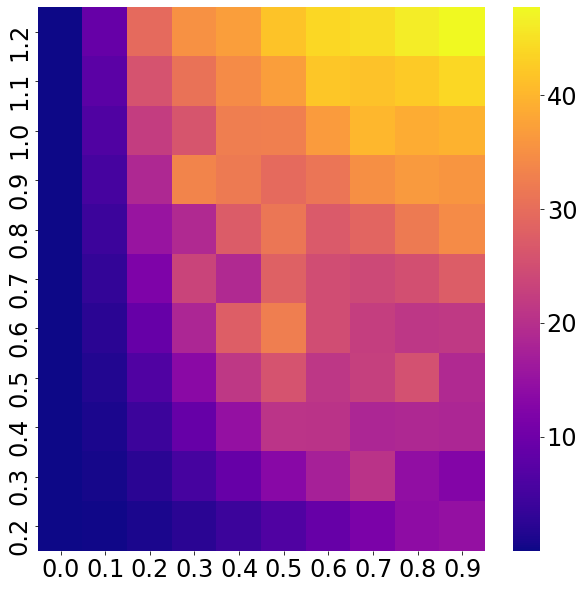

In [649]:
field_energy_df = pd.DataFrame(field_energy)
sb.heatmap(field_energy_df.transpose(), cmap='plasma')

In [296]:
def complex_array_to_rgb(X, theme='dark', rmax=None):
    '''Takes an array of complex number and converts it to an array of [r, g, b],
    where phase gives hue and saturaton/value are given by the absolute value.
    Especially for use with imshow for complex plots.'''
    absmax = rmax or np.abs(X).max()
    Y = np.zeros(X.shape + (3,), dtype='float')
    Y[..., 0] = np.angle(X) / (2 * math.pi) % 1
    if theme == 'light':
        Y[..., 1] = np.clip(np.abs(X) / absmax, 0, 1)
        Y[..., 2] = 1
    elif theme == 'dark':
        Y[..., 1] = 1
        Y[..., 2] = np.clip(np.abs(X) / absmax, 0, 1)
    Y = matplotlib.colors.hsv_to_rgb(Y)
    return Y

def complex_heatmap(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    plt.imshow(complex_array_to_rgb(data, theme, rmax))

def complex_heatmap_2(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    return data.transpose()

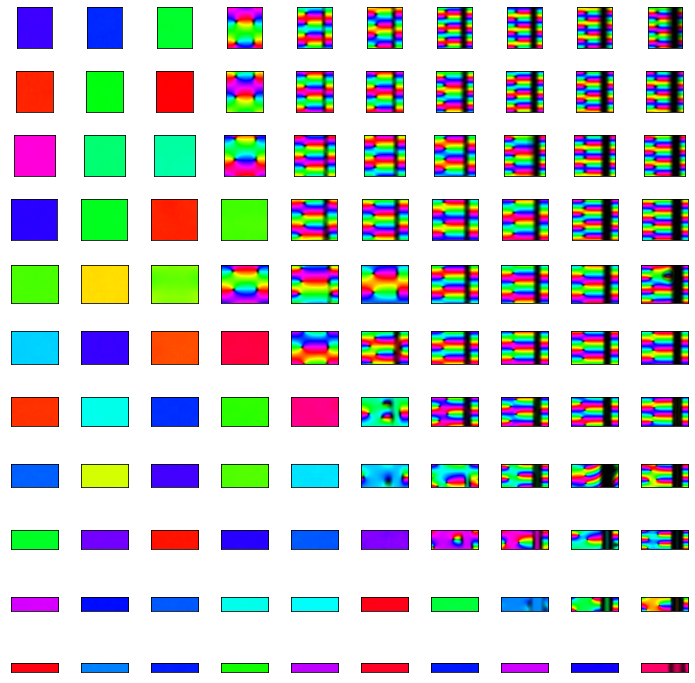

In [301]:
nrows, ncols = field_energy_df.transpose().shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

for ax, params in zip(axs.flat, [(k,a) for k in range(12,1, -1) for a in range(10)]):
    k,a= params
    #print(params)
    directory = "/home/jsk/cylinder/fixed_surfaces/k"+str(k)+"a"+str(a)
    try:
        filename=os.path.join(directory, "alpha_"+str(round(alpha,2))+"_C_"+str(round(c,2))+"_snapshot.csv")
        #print(filename)
        heatmap= complex_heatmap_2(filename)
        ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=1))
    except FileNotFoundError:
        pass
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()

In [635]:
#describing the dividing line with k,a pairs
vortex_transition=[(2.5,.35), (.75, .35), (-.05, 1.15)]

In [633]:
#for each (k,a) we need to plot, find field energy of nearest rounded k,a
field_energy_approx={}
for areafactor in minima:
    m=minima[areafactor]
    field_energy_approx[areafactor]=[]
    for (k,a) in m:
        roundk = round(k,1)
        if roundk > 1.2:
            roundk=1.2
        if roundk <.2:
            roundk=.2
        rounda= round(a,1)
        if rounda==1.0:
            rounda=0.9
        field_energy_approx[areafactor].append(field_energy_df.loc[rounda, roundk])

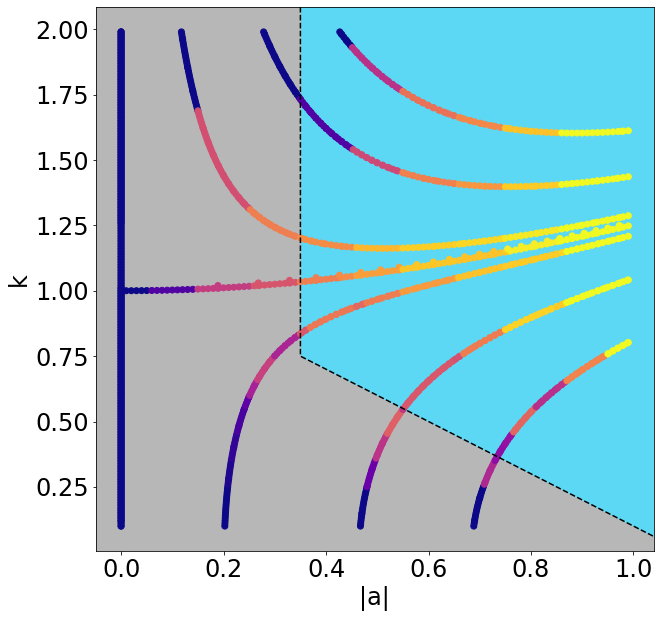

In [648]:
nonvortex='#b7b7b7'
vortex='#5dd8f4'
max_=2.5
min_=-1
plt.plot([x[1] for x in vortex_transition],[x[0] for x in vortex_transition], linestyle='--', color='black')
plt.fill_between([x[1] for x in vortex_transition],min_,[x[0] for x in vortex_transition], color=nonvortex)
plt.fill_between([x[1] for x in vortex_transition],[x[0] for x in vortex_transition],
                 np.max([x[0] for x in vortex_transition]), color=vortex)
plt.fill_between([min_,.35],min_,max_, color=nonvortex)
for areafactor in minima:
    plt.scatter([x[1] for x in minima[areafactor]], [x[0] for x in minima[areafactor]], 
                c=field_energy_approx[areafactor], cmap='plasma',label=areafactor)
plt.savefig("constrained_fieldeffect.png")
plt.ylim((.0055, 2.0845))
plt.xlim((-.0495, 1.0395))
plt.ylabel("k")
plt.xlabel("|a|")
plt.savefig("constrained_fieldeffect.png")